In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("car_evaluation.csv", header=None)

# Rename columns
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [3]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [7]:
# Convert categorical values to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [9]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [10]:
# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

In [11]:
# ---- Step 4: Split the Data ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (1382, 6)
Testing Set Size: (346, 6)


In [13]:
# ---- Step 5: Train the Random Forest Classifier ----
rf = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    criterion='gini',     # Splitting criterion: to decide best fit
    max_depth=None,       # Let it expand fully
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# ---- Step 6: Make Predictions ----
y_pred = rf.predict(X_test)

In [15]:
# ---- Step 7: Evaluate the Model ----
accuracy = accuracy_score(y_test, y_pred)
print("\n----- Model Evaluation -----")
print("Accuracy of Random Forest Classifier: {:.2f}%".format(accuracy * 100))


----- Model Evaluation -----
Accuracy of Random Forest Classifier: 98.27%


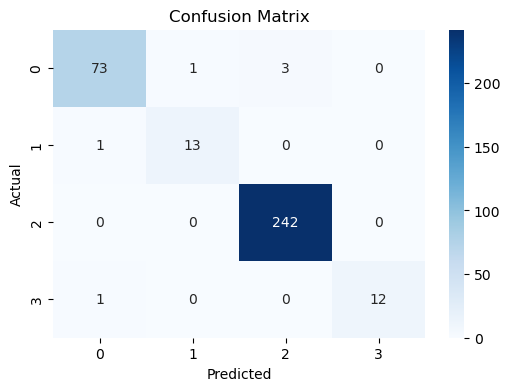

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.93      0.93      0.93        14
           2       0.99      1.00      0.99       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.95      0.96       346
weighted avg       0.98      0.98      0.98       346



In [18]:
# ---- Step 8: Feature Importance Visualization ----
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


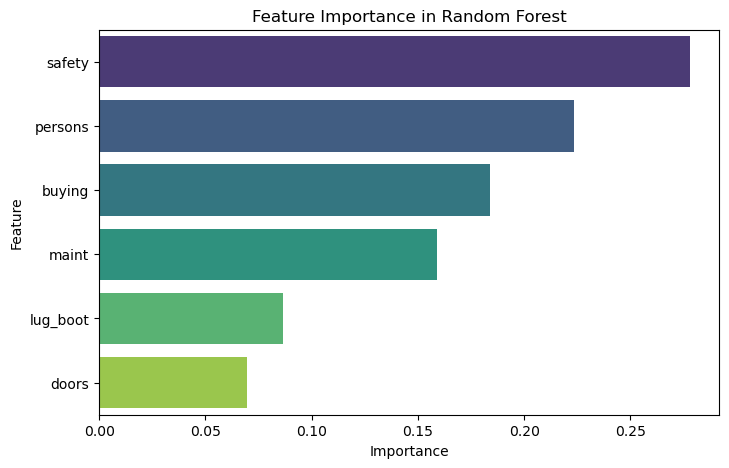

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.show()